In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

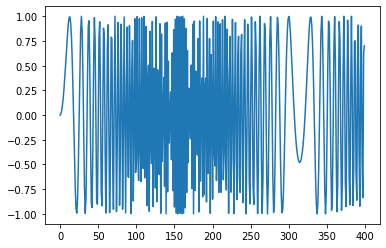

In [4]:
# plot it
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [6]:
Y[:9]

array([ 0.84147098,  0.935616  ,  0.99145835,  0.99290365,  0.92521152,
        0.7780732 ,  0.54935544,  0.24894679, -0.09824859])

In [7]:
X[0]

array([0.        , 0.00999983, 0.03998933, 0.08987855, 0.15931821,
       0.24740396, 0.35227423, 0.47062589, 0.59719544, 0.72428717])

In [8]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 17ms/step - loss: 1.3273 - val_loss: 1.0824
Epoch 2/80
7/7 [==============================] - 0s 4ms/step - loss: 1.1025 - val_loss: 0.9689
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 0.9296 - val_loss: 0.8711
Epoch 4/80
7/7 [==============================] - 0s 4ms/step - loss: 0.8024 - val_loss: 0.7989
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7035 - val_loss: 0.7489
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6336 - val_loss: 0.7067
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6722
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5483 - val_loss: 0.6509
Epoch 9/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5258 - val_loss: 0.6321
Epoch 10/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5102 - val_loss: 0.6103
Epoch 11/80
7/7 [=====================

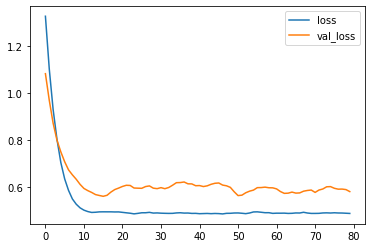

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


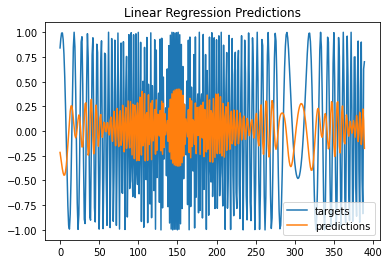

In [10]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

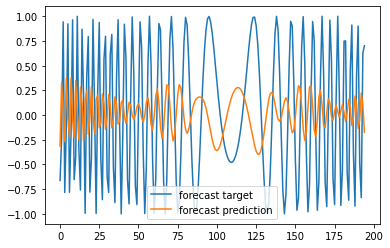

In [11]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

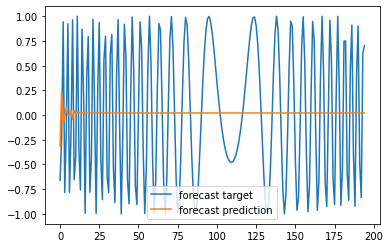

In [12]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [13]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 55ms/step - loss: 0.5346 - val_loss: 0.6052
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4990 - val_loss: 0.6237
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4946 - val_loss: 0.6478
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4698 - val_loss: 0.6021
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4189 - val_loss: 0.7058
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4164 - val_loss: 0.4993
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3223 - val_loss: 0.3766
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2770 - val_loss: 0.4199
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2127 - val_loss: 0.3108
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1564 - val_loss: 0.2703
Epoch 11/200
7/7 [==========

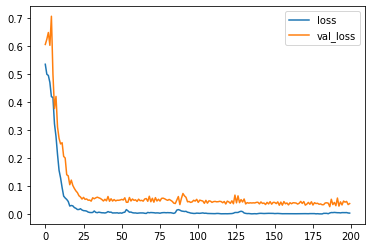

In [14]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


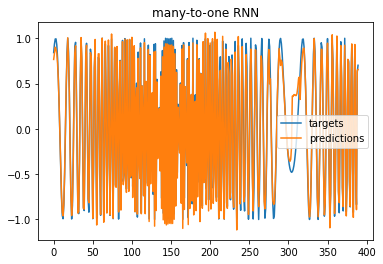

In [15]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

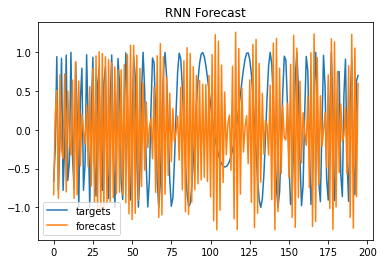

In [16]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()